# Online Retail II
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

## Input:

**Website:** https://archive.ics.uci.edu/dataset/502/online+retail+ii

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal. The name of the country where a customer resides.

## Output
Predicts the total sales per customer.

## Data mining function
Regression and predict

### Steps
- Reading data

- Fix Data Problems:
{
* Dealing with Missing values
* Remove Description column and set null values in Customer ID
* Removing duplicated rows
* Replace invalid data in Quantity and Price columns
* Cleaning Country column
* Create new column to Split Invoice into cancel or not
* Check duplicates
}

- Create new features

- Merge DataFrame and Groupby tables

- Preprocessing 

- Splitting data

- Extract numerical features and categorical Features

- Tuning Pipeline

- Deep learning model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

## Reading the data

In [2]:
# Reading The data
df = pd.concat(pd.read_excel('C:/Users/marim/OneDrive/Desktop/Havy/online+retail+ii/online_retail_II.xlsx', sheet_name = None), ignore_index= True)

In [3]:
#Dispaly the first 5 rows
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#Display last 5 rows
print(df.tail())

        Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                InvoiceDate  Price  Customer ID Country  
1067366 2011-12-09 12:50:00   2.10      12680.0  France  
1067367 2011-12-09 12:50:00   4.15      12680.0  France  
1067368 2011-12-09 12:50:00   4.15      12680.0  France  
1067369 2011-12-09 12:50:00   4.95      12680.0  France  
1067370 2011-12-09 12:50:00  18.00      12680.0  France  


In [5]:
#Display data shape
print(df.shape)

(1067371, 8)


In [6]:
#Display columns names
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [7]:
#Display columns datatype
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [8]:
#Display number of missing values in each column
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [9]:
#Display number of duplicates
print(df.duplicated().sum())

34335


**info function** display important information in each column

In [10]:
#Display some useful info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


**describe function** shows summary statistics, such as mean, median, and etcs for numerical columns.

In [11]:
#display statistical describtion about the data
print(df.describe())

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


**Observations:** There are problems in Quantity and Price columns there are negative values and this doesn't make sense.

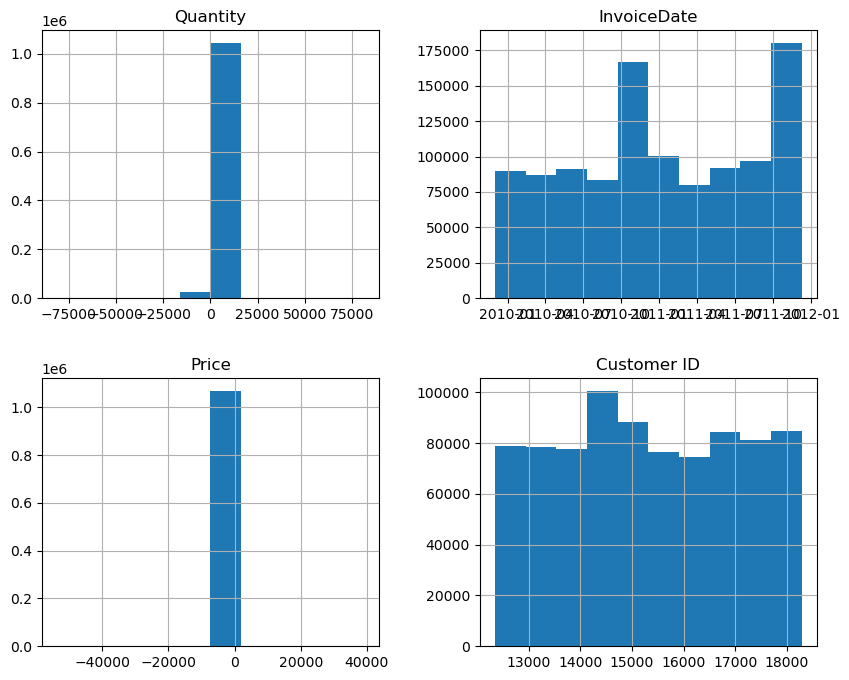

In [12]:
#Display data distribution
df.hist(figsize=(10,8));

**Observations:** There is no oultielr in these columns

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Fix Data Problems:
- Dealing with Missing values

- Remove Description column and set null values in Customer ID

- Removing duplicated rows

- Replace invalid data in Quantity and Price columns

- Cleaning Country column

- Create new column to Split Invoice into cancel or not

- Check duplicates


In [80]:
#Copy the dataframe
dfc = df.copy()

### Dealing with Missing values

In [81]:
#Display number of missing values in each column
print(dfc.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [82]:
# Display nulls in Description column
dfc[dfc['Description'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


### Remove Description column and set null values in Customer ID

In [83]:
# Remove the Description column because some StockCodes have many different descriptions.
dfc.drop(['Description'], axis = 1, inplace = True)

In [84]:
# Set value 11111.0 into NaN Customer ID as a visitor
col_name ='Customer ID'
dfc.loc[dfc[col_name].isnull(), col_name] = float(10000.0)

In [85]:
#Drop all nulls
dfc.dropna(inplace = True)

In [86]:
#Check nulls
dfc['Customer ID'].isnull().sum()

0

### Removing duplicated rows

In [87]:
print(f'Number of duplicates: {dfc.duplicated().sum()}')
dfc.drop_duplicates(inplace= True)

Number of duplicates: 34337


In [88]:
dfc

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0,France


### Replace invalid data in Quantity and Price columns

In [89]:
#Set all Quantities less than 1 equale 0
col_name ='Quantity'
dfc.loc[df[col_name] < 1, col_name] = 0

#Set all Price less than 0 equale 0
col_name ='Price'
dfc.loc[df[col_name] < 0.0, col_name] = 0.0


### Cleaning Country column

In [90]:
dfc['Country'].value_counts()

United Kingdom          948319
EIRE                     17667
Germany                  17339
France                   14025
Netherlands               5137
Spain                     3754
Switzerland               3175
Belgium                   3110
Portugal                  2528
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1362
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Unspecified                752
Greece                     663
Japan                      565
USA                        535
Poland                     527
United Arab Emirates       500
Israel                     368
Hong Kong                  360
Singapore                  346
Malta                      299
Canada                     228
Iceland                    222
RSA                        169
Lithuania                  154
Bahrain 

The column data is cleaned

### Create new column to Split Invoice into cancel or not

In [91]:
# Change invoice type into string
dfc['Invoice'] = dfc['Invoice'].astype(str)

In [92]:
# def cleaning_cancelled(row):
#     res = row['Invoice'][0]   #The first character in invoice row
#     char_res = 0    #Not cancelled invoice
#     if(res == 'C' or res == 'c'):
#       char_res = 1    #Cancelled invoice
#       # row['Invoice'].replace('^C', '')
#       res_row = row['Invoice'].replace(res, '')
#       print(res_row)
#     return char_res

# dfc['Cancelled_Invoice'] = dfc.apply(cleaning_cancelled, axis=1)

In [93]:
def cleaning_cancelled(row):
    res = row[0]   #The first character in invoice row
    char_res = 0    #Not cancelled invoice
    if(res == 'C' or res == 'c'):
      char_res = 1    #Cancelled invoice
      row.replace(res, '')  #Remove all First C
    #   print(row.replace(res, ''))
    return char_res

dfc['Cancelled_Invoice'] = dfc['Invoice'].apply(lambda row: cleaning_cancelled(row))


In [94]:
dfc['Cancelled_Invoice'].value_counts()

0    1013930
1      19104
Name: Cancelled_Invoice, dtype: int64

### Check duplicates

In [95]:
# Check duplicated rows
print(f'Number of duplicates: {dfc.duplicated().sum()}')
dfc.drop_duplicates(inplace = True)


Number of duplicates: 63


## Create new features


In [31]:
#Convert invoiceDate into time and date
dfc['invoice_date'] = [d.date() for d in dfc['InvoiceDate']]
dfc['invoice_time'] = [d.time() for d in dfc['InvoiceDate']]


In [32]:
# Separate the date into year, month, and day
# Convert the date column into a DateTime object
dfc['invoice_date'] = pd.to_datetime(dfc['invoice_date'])

# Extract the day, month, and year components
dfc['Invoice_day'] = dfc['invoice_date'].dt.day
dfc['Invoice_month'] = dfc['invoice_date'].dt.month
dfc['Invoice_year'] = dfc['invoice_date'].dt.year

In [33]:
dfc.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled_Invoice,invoice_date,invoice_time,Invoice_day,Invoice_month,Invoice_year
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009


In [34]:
#Total price for each item
dfc['Total_price_item'] = dfc['Quantity'] * dfc['Price']
dfc.columns

Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Cancelled_Invoice', 'invoice_date',
       'invoice_time', 'Invoice_day', 'Invoice_month', 'Invoice_year',
       'Total_price_item'],
      dtype='object')

In [35]:
#Total price for each customer
total_spend_each_cus_day = dfc.groupby(['Customer ID', 'Invoice_day'], as_index = False)['Total_price_item'].sum()
print(total_spend_each_cus_day)

# Check duplicates
print('Number of duplicated in total_spend_each_cus_day:', total_spend_each_cus_day.duplicated().sum())

       Customer ID  Invoice_day  Total_price_item
0          10000.0            1          72758.47
1          10000.0            2          75267.81
2          10000.0            3          70034.89
3          10000.0            4          92352.24
4          10000.0            5         106724.36
...            ...          ...               ...
29842      18287.0           12           1001.32
29843      18287.0           17           1071.61
29844      18287.0           21            892.60
29845      18287.0           22           1146.78
29846      18287.0           28             70.68

[29847 rows x 3 columns]
Number of duplicated in total_spend_each_cus_day: 0


In [39]:
# sns.scatterplot(total_spend_each_cus_day, x = 'Customer ID', y = 'Total_price_item', hue = 'Invoice_day')

In [40]:
#Total frequency of customer purchase
total_frequency_each_cus_year = dfc.groupby(['Customer ID', 'Invoice_year'], as_index = False)['Invoice'].nunique()
print(total_frequency_each_cus_year)

# Check duplicates
print('Number of duplicated in total_frequency_each_cus_year:', total_frequency_each_cus_year.duplicated().sum())

      Customer ID  Invoice_year  Invoice
0         10000.0          2009      430
1         10000.0          2010     4929
2         10000.0          2011     3393
3         12346.0          2009        5
4         12346.0          2010       10
...           ...           ...      ...
9576      18286.0          2009        1
9577      18286.0          2010        2
9578      18287.0          2009        1
9579      18287.0          2010        4
9580      18287.0          2011        3

[9581 rows x 3 columns]
Number of duplicated in total_frequency_each_cus_year: 0


In [42]:
# fig, ax = plt.subplots(figsize=(30, 20))
# # sns.lineplot(data = sales_month_year, x="Invoice_year", y = 'Invoice_month', ax = ax)
# sns.barplot(data = total_frequency_each_cus_year, x = "Invoice", y = "Invoice_year", hue = 'Customer ID')
# ax.set_title('Rate of sales in each month of a year')
# sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
# plt.show()

In [43]:
#Total number of purchace for each item pr product
frequency_each_product = dfc.groupby(['StockCode'], as_index = False)['Quantity'].sum()
print(frequency_each_product)

# Check duplicates
print('Number of duplicated in frequency_each_product:', frequency_each_product.duplicated().sum())


         StockCode  Quantity
0            10002      8851
1            10080       597
2            10109         4
3            10120       664
4            10125      2103
...            ...       ...
5300  gift_0001_60        13
5301  gift_0001_70        13
5302  gift_0001_80        13
5303  gift_0001_90        12
5304             m         5

[5305 rows x 2 columns]
Number of duplicated in frequency_each_product: 0


In [44]:
#Total price for each customer in each year
total_spend_each_cus_year = dfc.groupby(['Customer ID', 'Invoice_year'], as_index = False)['Total_price_item'].sum()
print(total_spend_each_cus_year)

# Check duplicates
print('Number of duplicated in total_spend_each_cus_year:', total_spend_each_cus_year.duplicated().sum())


      Customer ID  Invoice_year  Total_price_item
0         10000.0          2009         138979.94
1         10000.0          2010        1458977.90
2         10000.0          2011        1503871.91
3         12346.0          2009            113.50
4         12346.0          2010            259.36
...           ...           ...               ...
9576      18286.0          2009            462.95
9577      18286.0          2010            833.48
9578      18287.0          2009              0.00
9579      18287.0          2010           2345.71
9580      18287.0          2011           1837.28

[9581 rows x 3 columns]
Number of duplicated in total_spend_each_cus_year: 0


<Axes: xlabel='Customer ID', ylabel='Count'>

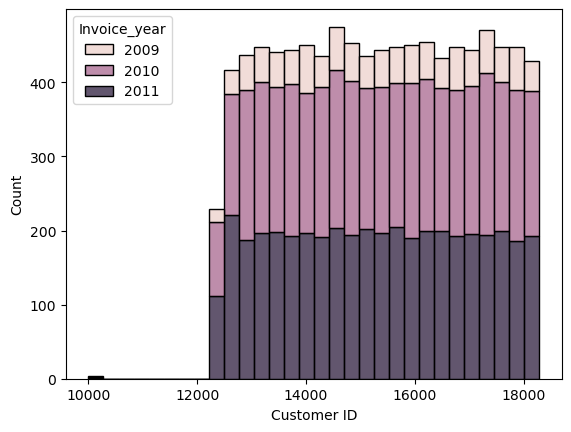

In [46]:
sns.histplot(data = total_spend_each_cus_year, x="Customer ID", hue="Invoice_year", multiple="stack")

Customer in 2010, 2011 spend sales more than 2009

In [47]:
#Total price for each customer in each year in each country
total_spend_each_cus_year_country = dfc.groupby(['Customer ID', 'Invoice_year', 'Country'], as_index = False)['Total_price_item'].sum()
print(total_spend_each_cus_year_country)

# Check duplicates
print('Number of duplicated in total_spend_each_cus_year_country:', total_spend_each_cus_year_country.duplicated().sum())

      Customer ID  Invoice_year         Country  Total_price_item
0         10000.0          2009            EIRE           1929.28
1         10000.0          2009         Nigeria              0.00
2         10000.0          2009  United Kingdom         137050.66
3         10000.0          2010         Bahrain           1755.42
4         10000.0          2010         Bermuda           1253.14
...           ...           ...             ...               ...
9610      18286.0          2009  United Kingdom            462.95
9611      18286.0          2010  United Kingdom            833.48
9612      18287.0          2009  United Kingdom              0.00
9613      18287.0          2010  United Kingdom           2345.71
9614      18287.0          2011  United Kingdom           1837.28

[9615 rows x 4 columns]
Number of duplicated in total_spend_each_cus_year_country: 0


c:\Users\marim\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


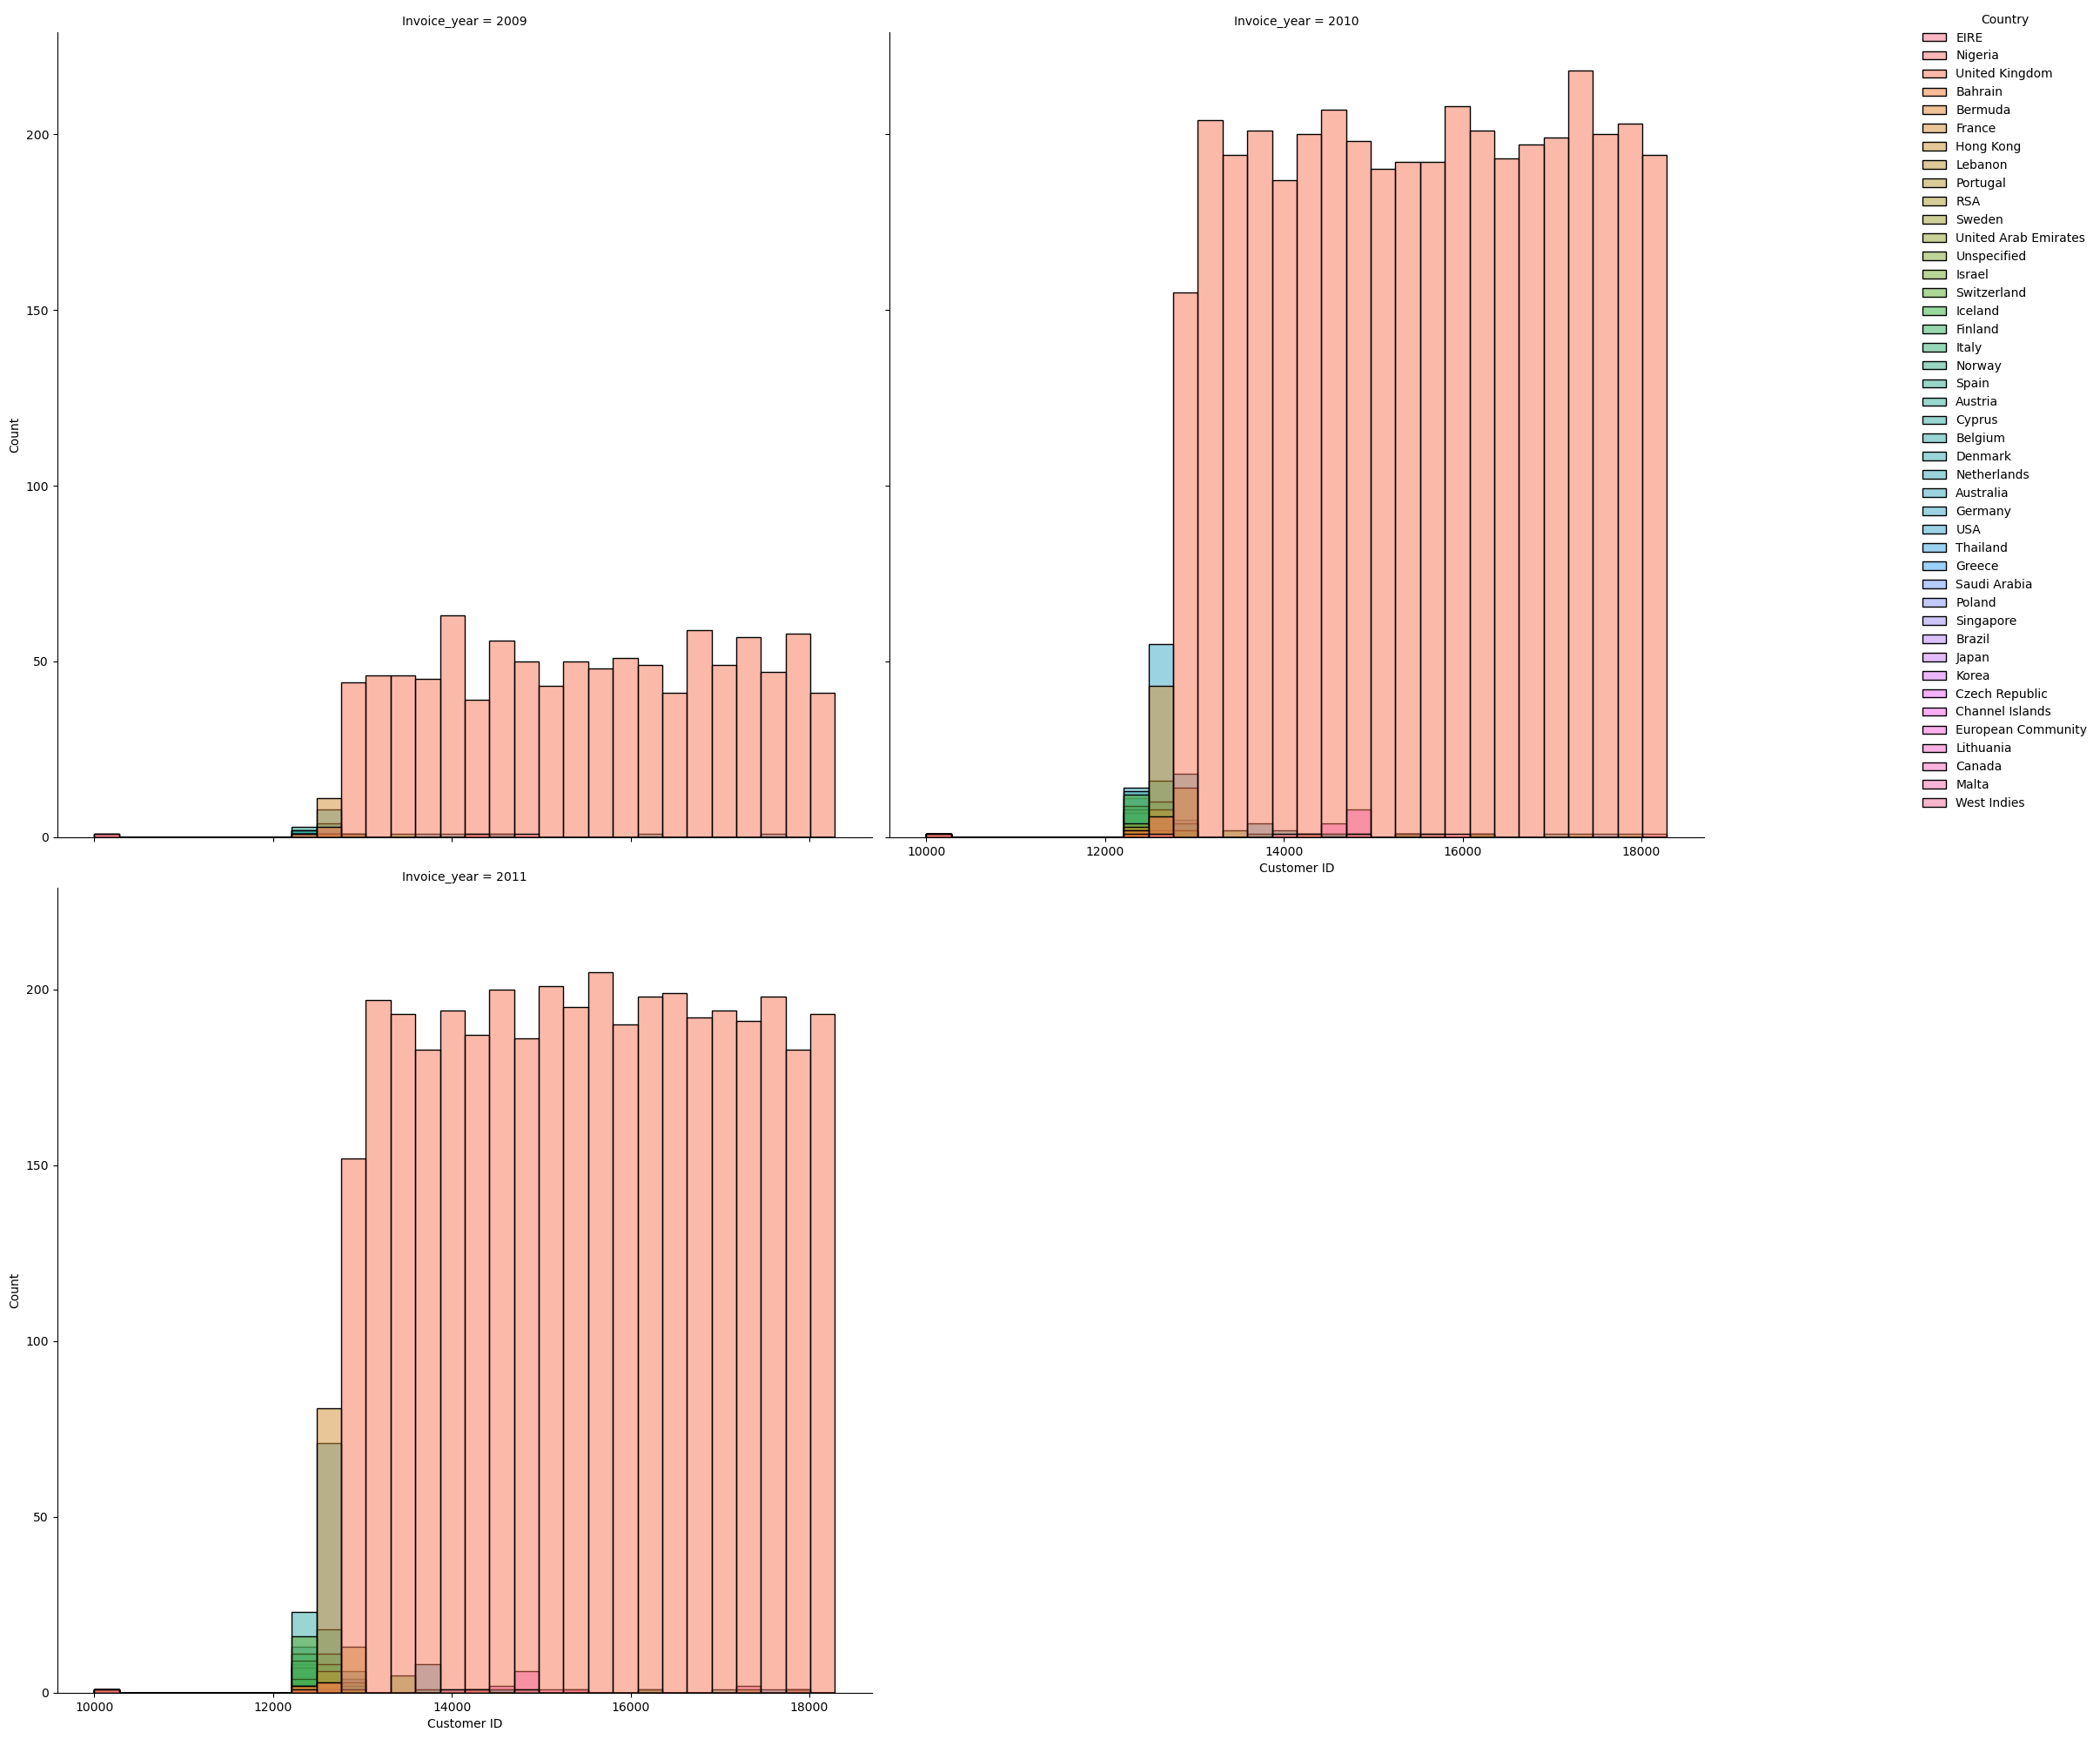

In [48]:
g = sns.displot(
    total_spend_each_cus_year_country,
    x = "Customer ID", hue=  'Country',
    col="Invoice_year", col_wrap=2, height=10, ax = (5, 15)
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [49]:
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.histplot(data=total_spend_each_cus_year_country, y="Customer ID", x = 'Invoice_year', hue='Country', multiple="hist", ax = ax)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()

In [50]:
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.histplot(data=total_spend_each_cus_year_country, hue="Customer ID", x = 'Invoice_year', col='Country', ax = ax)
# sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()

# g = sns.displot(
#     total_spend_each_cus_year_country,
#     x="Customer ID", hue=  'Country',
#     col="Invoice_year", col_wrap=2, height=10, ax = (5, 15)
# )
# sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

The most Country that Customer spend from it is United Kingdom

In [51]:
#Sales in each month of a year
sales_month_year = dfc.groupby(['Invoice_year', 'Invoice_month'], as_index = False)['Total_price_item'].sum()
print(sales_month_year)

# Check duplicates
print('Number of duplicated in sales_month_year:', sales_month_year.duplicated().sum())


    Invoice_year  Invoice_month  Total_price_item
0           2009             12        822483.950
1           2010              1        651155.112
2           2010              2        551878.296
3           2010              3        830915.261
4           2010              4        678875.252
5           2010              5        657705.500
6           2010              6        749537.310
7           2010              7        648810.270
8           2010              8        695251.910
9           2010              9        921696.991
10          2010             10       1161902.220
11          2010             11       1464293.142
12          2010             12        821452.730
13          2011              1        689811.610
14          2011              2        522545.560
15          2011              3        716215.260
16          2011              4        536968.491
17          2011              5        769281.760
18          2011              6        760547.010


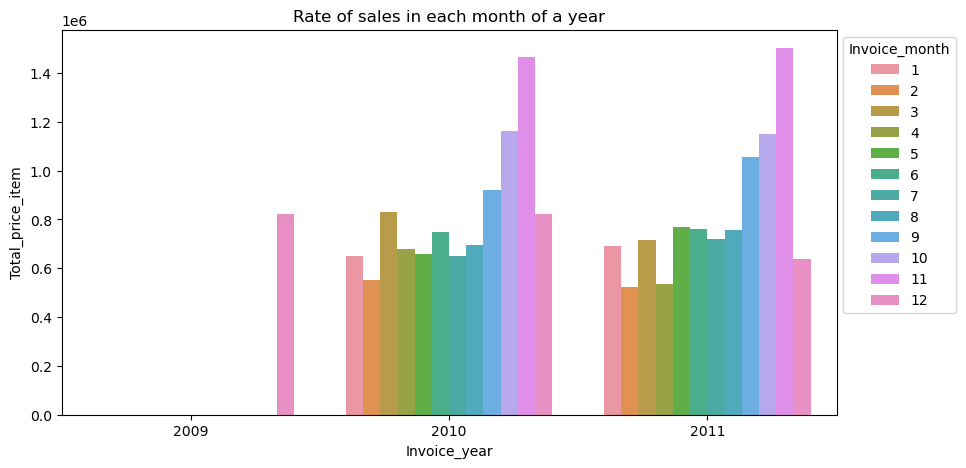

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
# sns.lineplot(data = sales_month_year, x="Invoice_year", y = 'Invoice_month', ax = ax)
sns.barplot(data = sales_month_year, x="Invoice_year", hue = 'Invoice_month', y = "Total_price_item")
ax.set_title('Rate of sales in each month of a year')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Sales in 2009 were only in the last month, however
Sales in 2010 and 2011 in months 9, 10 and 11 were higher than the remaining months.

## Merge DataFrame and Groupby tables

In [54]:
how_val = 'inner'

#Merge dfc and total_spend_each_cus_day df
merged_df = pd.merge(dfc, total_spend_each_cus_day, on = ['Customer ID', 'Invoice_day'], how = how_val, suffixes = (None, '_spend_each_cus_day'))

# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())


Number of duplicated in merged_df: 0


In [55]:

#Merge dfc and total_spend_each_cus_year df
merged_df = pd.merge(merged_df, total_spend_each_cus_year, on= ['Customer ID', 'Invoice_year'], how = how_val, suffixes = (None, '_total_spend_each_cus_year'))
# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())

#Merge dfc and total_frequency_each_cus_year df
merged_df = pd.merge(merged_df, total_frequency_each_cus_year, on= ['Customer ID', 'Invoice_year'], how = how_val, suffixes = (None, '_frequency_each_cus_year'))
# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())

Number of duplicated in merged_df: 0
Number of duplicated in merged_df: 0


In [56]:
#Merge dfc and frequency_each_product df
merged_df = pd.merge(merged_df, frequency_each_product, on= ['StockCode'], how = how_val, suffixes = (None, '_frequency_each_product'))
# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())

#Merge dfc and total_spend_each_cus_year_country df
merged_df = pd.merge(merged_df, total_spend_each_cus_year_country, on= ['Customer ID', 'Invoice_year', 'Country'], how = how_val, suffixes = (None, '_total_spend_each_cus_year_country'))
# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())

#Merge dfc and sales_month_year df
merged_df = pd.merge(merged_df, sales_month_year, on= ['Invoice_year', 'Invoice_month'], how = how_val, suffixes = (None, '_sales_month_year'))
# Check duplicates
print('Number of duplicated in merged_df:', merged_df.duplicated().sum())

#Show the first 5 rows
merged_df.head()

Number of duplicated in merged_df: 0
Number of duplicated in merged_df: 0
Number of duplicated in merged_df: 0


,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled_Invoice,invoice_date,invoice_time,Invoice_day,Invoice_month,Invoice_year,Total_price_item,Total_price_item_spend_each_cus_day,Total_price_item_total_spend_each_cus_year,Invoice_frequency_each_cus_year,Quantity_frequency_each_product,Total_price_item_total_spend_each_cus_year_country,Total_price_item_sales_month_year
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,83.4,651.1,1096.8,4,2685,1096.8,822483.95
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,81.0,651.1,1096.8,4,2281,1096.8,822483.95
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,81.0,651.1,1096.8,4,3004,1096.8,822483.95
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,100.8,651.1,1096.8,4,7540,1096.8,822483.95
4,490069,22041,12,2009-12-03 14:07:00,2.55,13085.0,United Kingdom,0,2009-12-03,14:07:00,3,12,2009,30.6,445.7,1096.8,4,7540,1096.8,822483.95


## Preprocessing

In [57]:
merged_df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled_Invoice,invoice_date,invoice_time,Invoice_day,Invoice_month,Invoice_year,Total_price_item,Total_price_item_spend_each_cus_day,Total_price_item_total_spend_each_cus_year,Invoice_frequency_each_cus_year,Quantity_frequency_each_product,Total_price_item_total_spend_each_cus_year_country,Total_price_item_sales_month_year
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,83.4,651.1,1096.8,4,2685,1096.8,822483.95
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,81.0,651.1,1096.8,4,2281,1096.8,822483.95
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,81.0,651.1,1096.8,4,3004,1096.8,822483.95
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,2009-12-01,07:45:00,1,12,2009,100.8,651.1,1096.8,4,7540,1096.8,822483.95
4,490069,22041,12,2009-12-03 14:07:00,2.55,13085.0,United Kingdom,0,2009-12-03,14:07:00,3,12,2009,30.6,445.7,1096.8,4,7540,1096.8,822483.95


In [58]:
#Deleted the useless columns
merged_df.drop(['Invoice', 'StockCode', 'InvoiceDate', 'Customer ID','invoice_date', 'invoice_time'], inplace = True, axis = 1)

In [59]:
# Show the first 5 rows
merged_df.head()

,Quantity,Price,Country,Cancelled_Invoice,Invoice_day,Invoice_month,Invoice_year,Total_price_item,Total_price_item_spend_each_cus_day,Total_price_item_total_spend_each_cus_year,Invoice_frequency_each_cus_year,Quantity_frequency_each_product,Total_price_item_total_spend_each_cus_year_country,Total_price_item_sales_month_year
0,12,6.95,United Kingdom,0,1,12,2009,83.4,651.1,1096.8,4,2685,1096.8,822483.95
1,12,6.75,United Kingdom,0,1,12,2009,81.0,651.1,1096.8,4,2281,1096.8,822483.95
2,12,6.75,United Kingdom,0,1,12,2009,81.0,651.1,1096.8,4,3004,1096.8,822483.95
3,48,2.10,United Kingdom,0,1,12,2009,100.8,651.1,1096.8,4,7540,1096.8,822483.95
4,12,2.55,United Kingdom,0,3,12,2009,30.6,445.7,1096.8,4,7540,1096.8,822483.95


In [60]:
# The size of the dataframe
merged_df.shape

(1032971, 14)

In [61]:
# Check duplicated rows
print(f'Number of duplicates: {merged_df.duplicated().sum()}')

# Remove all duplicated rows
merged_df.drop_duplicates(inplace = True)

Number of duplicates: 25124


In [62]:
# #correlation
# corr = merged_df.corr()
# # fig, ax = plt.subplots(figsize=(10, 5))
 
# plt.figure(figsize=(20, 10))
# sns.heatmap(merged_df.corr(), annot=True)
# plt.show()

## Splitting Data

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [64]:
# Collect all int columns
col_int = merged_df.select_dtypes('int64')

# Collect all float columns
col_float = merged_df.select_dtypes('float64')

# Collect all categoricat columns
col_object = merged_df.select_dtypes('object')

for col_name in col_object.columns:
    merged_df[col_name] = merged_df[col_name].astype('category')

type(merged_df[col_object.columns])

pandas.core.frame.DataFrame

In [65]:
# Split data into X, and y
X = merged_df.loc[:, merged_df.columns != 'Total_price_item_total_spend_each_cus_year']
y = merged_df.loc[:, 'Total_price_item_total_spend_each_cus_year']

In [66]:
# Split X, y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

## Extract numerical features and categorical Features

In [67]:
#Numerical Features
numerical_features = list(X_train.select_dtypes(include= ['float64', 'int64']))

#Categorical Features
categorical_features = list(X_train.select_dtypes(include=['category']))

#Display numerical and categorical features
print('numerical_features: \n', numerical_features)
print('categorical_features\n', categorical_features)

numerical_features: 
 ['Quantity', 'Price', 'Cancelled_Invoice', 'Invoice_day', 'Invoice_month', 'Invoice_year', 'Total_price_item', 'Total_price_item_spend_each_cus_day', 'Invoice_frequency_each_cus_year', 'Quantity_frequency_each_product', 'Total_price_item_total_spend_each_cus_year_country', 'Total_price_item_sales_month_year']
categorical_features
 ['Country']


In [68]:
# Display the shape of each column
for i in numerical_features:
    print(f"The {i}: {X_train[i].shape}\n")

y_train.shape

The Quantity: (806277,)

The Price: (806277,)

The Cancelled_Invoice: (806277,)

The Invoice_day: (806277,)

The Invoice_month: (806277,)

The Invoice_year: (806277,)

The Total_price_item: (806277,)

The Total_price_item_spend_each_cus_day: (806277,)

The Invoice_frequency_each_cus_year: (806277,)

The Quantity_frequency_each_product: (806277,)

The Total_price_item_total_spend_each_cus_year_country: (806277,)

The Total_price_item_sales_month_year: (806277,)



(806277,)

## Tuning pipeline

In [70]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from platform import processor
from sklearn.metrics import mean_squared_error

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [71]:
pipe_categorical = Pipeline(
    steps = [
        # Dummy encoding — N categories in a variable, N-1 binary variables.
        # ('get_dum', pd.get_dummies(X_train ,drop_first = True))])

        # Encoding helps to prevent bias in the model by ensuring that all features are equally weighted.
        # sparse = False to not convert the array into Sparse Matrices (to still pandas)
        ('one_hot', OneHotEncoder(handle_unknown = "ignore", sparse = False))])


pipe_numerical = Pipeline(
    steps = [
        # There is a large scale between features values.
        # Feature distribution are unknown.
        # so the best solution to scale is Normalization.
        # To avoid outliers I will used min/max scaler
        ('scaler', preprocessing.MinMaxScaler())])
        # ('scaler', StandardScaler())])


#Applying steps of transformer in numerical and categorical features
preprocessing = ColumnTransformer(
    transformers = [
                  ('num', pipe_numerical, numerical_features),
                   ('cat', pipe_categorical, categorical_features)
    ])

# output is continuous values so it will used a regression models 
# Dependent variable is continuous values so we can use linear regression
######## If I used feature select I should use lasso regression model 
# Linear Regression model
# Bayesian Linear Regression (Linear Regression + Ridge Regression) but is more stable than the simple Linear Regression.
# Deep learning model
# Random Forest regression is an ensemble learning method which combines multiple decision trees and predicts the final output based on the average of each tree output.
preprocessing_pipeline = Pipeline(
    steps = [
             ('preprocessing', preprocessing),
            #  ('selector', SelectKBest(mutual_info_classif, k= 'all')),
            #  ('my_classifier',LinearRegression())
    ]
) 
#LinearRegression Classifier by using feature selection
full_pipeline_LR_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessing),
             ('my_classifier', LinearRegression())
    ]
)

#BayesianRidge Classifier by using feature selection
full_pipeline_BR_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessing),
             ('my_classifier', BayesianRidge())
    ]
)

# #SVM Classifier by using feature selection
# full_pipeline_SVM_FS = Pipeline(
#     steps = [
#              ('preprocessing', preprocessing),
#              ('my_classifier', SVR(kernel = 'poly'))
#     ]
# )

#RandomForestRegressor Classifier by using feature selection
full_pipeline_RFR_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessing),
             ('my_classifier', RandomForestRegressor())
    ]
)

# #PolynomialFeatures Classifier by using feature selection
# full_pipeline_PFR_FS = Pipeline(
#     steps = [
#              ('preprocessing', preprocessing),
#             #  ('selector', SelectKBest(mutual_info_classif, k=50)),
#              ('my_classifier', PolynomialFeatures())
#     ]
# )

In [72]:
# Function to print the accuracy and name of the model
def print_res(model_accuracy, model_name):
    print(f'The accuracy of {model_name} is {model_accuracy}')

#### Linear Regression model

In [73]:
full_pipeline_LR_FS = full_pipeline_LR_FS.fit(X_train, y_train)
y_pred = full_pipeline_LR_FS.predict(X_train)
y_pred_test = full_pipeline_LR_FS.predict(X_test)
res_model = full_pipeline_LR_FS.score(X_test, y_test)
print_res(res_model, 'Linear Regression')
print('Train mean_squared_error train:', mean_squared_error(full_pipeline_LR_FS.predict(X_train), y_train))
print('Test mean_squared_error test:', mean_squared_error(full_pipeline_LR_FS.predict(X_test), y_test))

c:\Users\marim\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of Linear Regression is 0.9910057464633097
Train mean_squared_error train: 3196143135.5968466
Test mean_squared_error test: 3139548247.412535


#### BayesianRidge Regression model

In [74]:
#fit the model after getting the optimal hyperparameters values

full_pipeline_BR_FS = full_pipeline_BR_FS.fit(X_train, y_train)
# full_pipeline_BR_FS = full_pipeline_BR_FS.fit(full_pipeline_BR_FS_pro)
y_pred = full_pipeline_BR_FS.predict(X_test)
res_model = full_pipeline_BR_FS.score(X_test, y_test)
print_res(res_model, 'BayesianRidge Regression model')
print('Train mean_squared_error train:', mean_squared_error(full_pipeline_BR_FS.predict(X_train), y_train))
print('Test mean_squared_error test:', mean_squared_error(full_pipeline_BR_FS.predict(X_test), y_test))

c:\Users\marim\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of BayesianRidge Regression model is 0.991005713715129
Train mean_squared_error train: 3196143211.9713106
Test mean_squared_error test: 3139559678.543868


In [75]:
print('Train mean_squared_error train:', mean_squared_error(full_pipeline_BR_FS.predict(X_train), y_train))
print('Test mean_squared_error test:', mean_squared_error(full_pipeline_BR_FS.predict(X_test), y_test))

Train mean_squared_error train: 3196143211.9713106
Test mean_squared_error test: 3139559678.543868


## Deep Learning model

In [76]:
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Encoding X training and testing
X_train_clean = pd.get_dummies(X_train, columns = categorical_features)
X_test_clean = pd.get_dummies(X_test, columns = categorical_features)


# define min max scaler for Categorical columns
scaler = MinMaxScaler()
# transform data
X_train_clean = scaler.fit_transform(X_train_clean)
X_train_clean

X_test_clean = scaler.fit_transform(X_test_clean)
X_test_clean

array([[1.56641604e-04, 2.22050898e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.22713971e-04, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.26566416e-04, 4.91472653e-05, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.30534670e-03, 2.48697005e-05, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.04427736e-04, 4.43509660e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.13283208e-04, 1.74680039e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [78]:
print(X_train_clean.shape)
print(X_train.shape)

(806277, 55)
(806277, 13)


Epoch 1/100
2581/2581 [==============================] - 20s 7ms/step - loss: 69505867776.0000 - mean_squared_error: 69505867776.0000 - mean_absolute_error: 105504.5391 - mean_absolute_percentage_error: 11297408000.0000 - cosine_proximity: 0.9992 - val_loss: 2667047680.0000 - val_mean_squared_error: 2667047680.0000 - val_mean_absolute_error: 22238.5430 - val_mean_absolute_percentage_error: 2439854336.0000 - val_cosine_proximity: 0.9995
Epoch 2/100
2581/2581 [==============================] - 15s 6ms/step - loss: 3696994048.0000 - mean_squared_error: 3696994048.0000 - mean_absolute_error: 25824.5449 - mean_absolute_percentage_error: 2435705600.0000 - cosine_proximity: 0.9905 - val_loss: 576519360.0000 - val_mean_squared_error: 576519360.0000 - val_mean_absolute_error: 9475.0508 - val_mean_absolute_percentage_error: 1688914048.0000 - val_cosine_proximity: 0.9904
Epoch 3/100
2581/2581 [==============================] - 15s 6ms/step - loss: 2401071616.0000 - mean_squared_error: 2401071616.

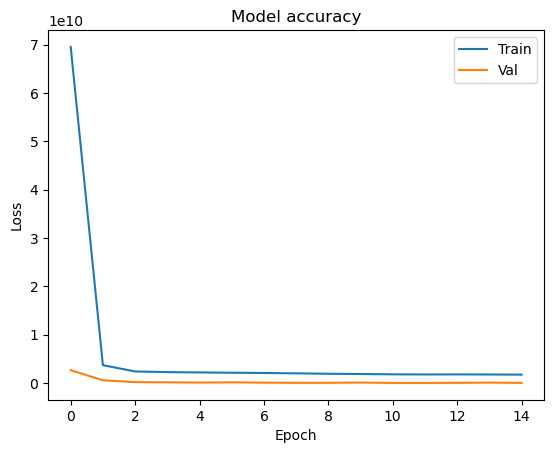

In [79]:
model = Sequential()
model.add(Dense(500, input_dim = X_train_clean.shape[1], activation = "relu"))
model.add(Dense(100, activation = "relu"))
# To prevent overfitting
model.add(Dropout(0.2))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam", metrics = ["mean_squared_error", 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
# To prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_clean, y_train, epochs = 100, batch_size = 250, verbose = 1, validation_split = 0.2, callbacks=[early_stopping])
pred_train= model.predict(X_train_clean)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred= model.predict(X_test_clean)
print(np.sqrt(mean_squared_error(y_test, pred)))
# plot metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()
